In [49]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import LinearSVC

titanic_df = pd.read_csv("../datasets/Titanic-Dataset.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Find the columns that are irrelevant for the analysis and drop those from the dataset - check with correlation plots
## Drop/Impute null or empty values from the dataset
## Encode the data with LabelEncoder and OneHotEncoder in case of categorical data
## Check for outliers and remove them - boxplot
## Use train_test_split to split the data into training and testing sets
## Use different classification models to predict the target variable
## Compare accuracy, prediction score, recall to find the best model
## Use GridSearchCV to find the best hyperparameters for the model


In [50]:
titanic_df.drop(columns=["PassengerId", "Name", 'Ticket', 'Cabin'], inplace=True)

In [51]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [52]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [53]:
titanic_df.shape

(891, 8)

In [54]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived    179
Pclass      179
Sex         179
Age           2
SibSp       179
Parch       179
Fare        179
Embarked    177
dtype: int64

<Axes: >

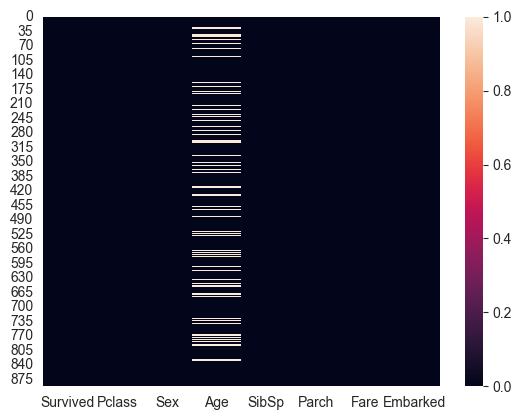

In [56]:
# check na values
import seaborn as sns

sns.heatmap(titanic_df.isnull())

In [57]:
"""Drop rows with missing values"""
titanic_df.dropna(inplace=True)
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [58]:
titanic_df.shape

(712, 8)

In [59]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
titanic_df['Sex'] = encoder.fit_transform(titanic_df['Sex']).astype(str)

In [60]:
oneHotEncoder = preprocessing.OneHotEncoder()
titanic_df['Embarked'] = encoder.fit_transform(titanic_df['Embarked']).astype(str)
t = pd.get_dummies(titanic_df['Embarked'])

titanic_df.describe()



,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


<Axes: >

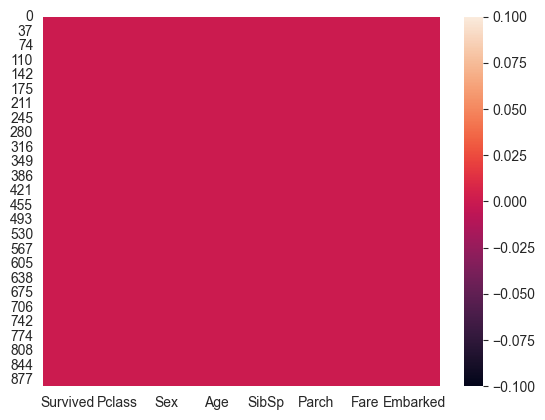

In [61]:
# check na values
import seaborn as sns

sns.heatmap(titanic_df.isnull())

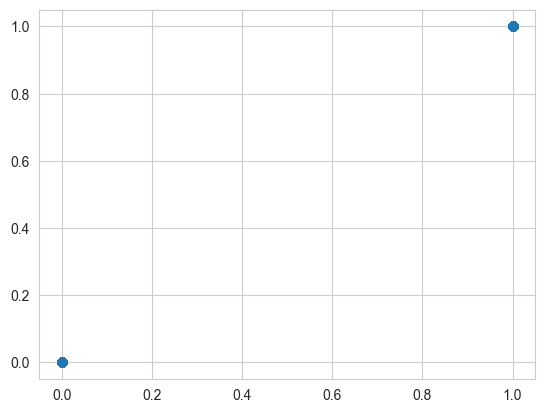

In [62]:
plt.scatter(titanic_df['Survived'], titanic_df['Survived'])

In [63]:
titanic_df.dropna(inplace=True)

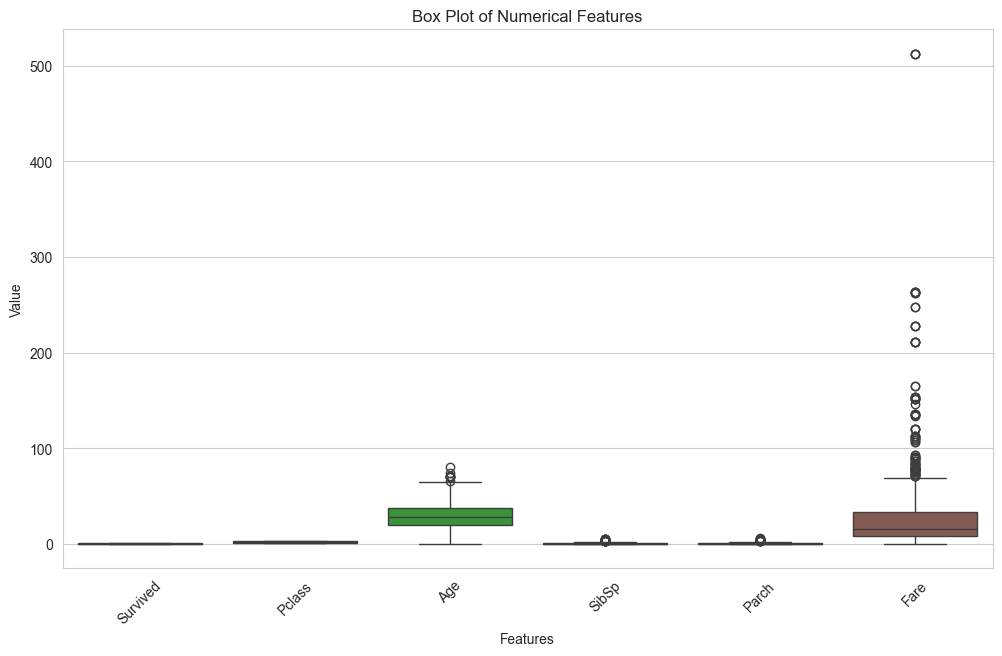

In [64]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def create_boxplot(df):
    df_copy = df.copy()
    num_cols = df_copy.select_dtypes(include=["float64", "int64"]).columns
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=df_copy[num_cols])
    plt.xticks(rotation=45)
    plt.title("Box Plot of Numerical Features")
    plt.ylabel("Value")
    plt.xlabel("Features")
    plt.show()


def replace_outliers_iqr(df):
    for column in df.select_dtypes(include=["float64", "int64"]).columns:
        # Calculate Q1, Q3, and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with the bounds
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])  # Replace values below lower bound
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])  # Replace values above upper bound

    return df


# fining outliers
# df_copy = titanic_df.copy(deep=True)
create_boxplot(titanic_df)


In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = titanic_df.drop(columns=["Survived"])  # Features (all columns except 'Price')
y = titanic_df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)



In [67]:
from sklearn.metrics import precision_score, recall_score


def summarize_classification(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    return {'accuracy': acc, 'precision': prec, 'recall': recall, 'accuracy_count': num_acc}


def build_model(classification_fn, name_of_y_col, names_of_x_cols, dataset, test_frac=0.2):
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
    model = classification_fn(x_train, y_train)
    y_pred = model.predict(x_test)

    y_pred_train = model.predict(x_train)
    train_summary = summarize_classification(y_train, y_pred_train)
    test_summary = summarize_classification(y_test, y_pred)

    pred_results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
    model_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)

    return {'training': train_summary,
            'test': test_summary,
            'confusion_matrix': model_crosstab}


def compare_results(result_dict):
    for key in result_dict:
        print('Classification: ', key)
        print()
        print('Training data')
        for score in result_dict[key]['training']:
            print(score, result_dict[key]['training'][score])
        print()
        print('Test data')
        for score in result_dict[key]['test']:
            print(score, result_dict[key]['test'][score])
        print()

## Running Logistic Regression model

In [68]:
def logistic_fn(x_train, y_train):
    model = LogisticRegression(solver='liblinear')
    model.fit(x_train, y_train)
    return model


result_dict = dict()
result_dict['survived ~ logistic'] = build_model(logistic_fn, 'Survived', X.columns, titanic_df)
compare_results(result_dict)

Classification:  survived ~ logistic

Training data
accuracy 0.8031634446397188
precision 0.7871287128712872
recall 0.6973684210526315
accuracy_count 457.0

Test data
accuracy 0.7622377622377622
precision 0.75
recall 0.65
accuracy_count 109.0



## Running Linear Discriminant Analysis model

In [69]:
def linear_discriminant_fn(x_train, y_train):
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    model = LinearDiscriminantAnalysis()
    model.fit(x_train, y_train)
    return model


result_dict['survived ~ linear_discriminant'] = build_model(linear_discriminant_fn, 'Survived', X.columns, titanic_df)
compare_results(result_dict)

Classification:  survived ~ logistic

Training data
accuracy 0.8031634446397188
precision 0.7871287128712872
recall 0.6973684210526315
accuracy_count 457.0

Test data
accuracy 0.7622377622377622
precision 0.75
recall 0.65
accuracy_count 109.0

Classification:  survived ~ linear_discriminant

Training data
accuracy 0.8031634446397188
precision 0.7733333333333333
recall 0.7404255319148936
accuracy_count 457.0

Test data
accuracy 0.7762237762237763
precision 0.7333333333333333
recall 0.6226415094339622
accuracy_count 111.0



## Running Quadratic Discriminant Analysis model

In [70]:
def quadratic_discriminant_fn(x_train, y_train):
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
    model = QuadraticDiscriminantAnalysis()
    model.fit(x_train, y_train)
    return model


result_dict['survived ~ quadratic_discriminant'] = build_model(quadratic_discriminant_fn, 'Survived', X.columns,
                                                               titanic_df)
compare_results(result_dict)

Classification:  survived ~ logistic

Training data
accuracy 0.8031634446397188
precision 0.7871287128712872
recall 0.6973684210526315
accuracy_count 457.0

Test data
accuracy 0.7622377622377622
precision 0.75
recall 0.65
accuracy_count 109.0

Classification:  survived ~ linear_discriminant

Training data
accuracy 0.8031634446397188
precision 0.7733333333333333
recall 0.7404255319148936
accuracy_count 457.0

Test data
accuracy 0.7762237762237763
precision 0.7333333333333333
recall 0.6226415094339622
accuracy_count 111.0

Classification:  survived ~ quadratic_discriminant

Training data
accuracy 0.8014059753954306
precision 0.7718446601941747
recall 0.7066666666666667
accuracy_count 456.0

Test data
accuracy 0.8531468531468531
precision 0.828125
recall 0.8412698412698413
accuracy_count 122.0



## Running Stochastic Gradient Descent model

In [71]:
def sgd_fn(x_train, y_train):
    from sklearn.linear_model import SGDClassifier
    model = SGDClassifier(max_iter=1000, tol=1e-3)
    model.fit(x_train, y_train)
    return model


result_dict['survived ~ sgd'] = build_model(sgd_fn, 'Survived', X.columns, titanic_df)
compare_results(result_dict)

Classification:  survived ~ logistic

Training data
accuracy 0.8031634446397188
precision 0.7871287128712872
recall 0.6973684210526315
accuracy_count 457.0

Test data
accuracy 0.7622377622377622
precision 0.75
recall 0.65
accuracy_count 109.0

Classification:  survived ~ linear_discriminant

Training data
accuracy 0.8031634446397188
precision 0.7733333333333333
recall 0.7404255319148936
accuracy_count 457.0

Test data
accuracy 0.7762237762237763
precision 0.7333333333333333
recall 0.6226415094339622
accuracy_count 111.0

Classification:  survived ~ quadratic_discriminant

Training data
accuracy 0.8014059753954306
precision 0.7718446601941747
recall 0.7066666666666667
accuracy_count 456.0

Test data
accuracy 0.8531468531468531
precision 0.828125
recall 0.8412698412698413
accuracy_count 122.0

Classification:  survived ~ sgd

Training data
accuracy 0.7311072056239016
precision 0.6303630363036303
recall 0.8232758620689655
accuracy_count 416.0

Test data
accuracy 0.7692307692307693
precisi

## Running Support Vector Machine

In [72]:
def svc_fn(x_train, y_train, c=1.0, max_iter=1000, tol=1e-3):
    from sklearn.svm import LinearSVC
    model = LinearSVC(C=c, max_iter=max_iter, tol=tol, dual=False)
    model.fit(x_train, y_train)
    return model


result_dict['survived ~ linear_svc'] = build_model(svc_fn, 'Survived', X.columns, titanic_df)
compare_results(result_dict)


Classification:  survived ~ logistic

Training data
accuracy 0.8031634446397188
precision 0.7871287128712872
recall 0.6973684210526315
accuracy_count 457.0

Test data
accuracy 0.7622377622377622
precision 0.75
recall 0.65
accuracy_count 109.0

Classification:  survived ~ linear_discriminant

Training data
accuracy 0.8031634446397188
precision 0.7733333333333333
recall 0.7404255319148936
accuracy_count 457.0

Test data
accuracy 0.7762237762237763
precision 0.7333333333333333
recall 0.6226415094339622
accuracy_count 111.0

Classification:  survived ~ quadratic_discriminant

Training data
accuracy 0.8014059753954306
precision 0.7718446601941747
recall 0.7066666666666667
accuracy_count 456.0

Test data
accuracy 0.8531468531468531
precision 0.828125
recall 0.8412698412698413
accuracy_count 122.0

Classification:  survived ~ sgd

Training data
accuracy 0.7311072056239016
precision 0.6303630363036303
recall 0.8232758620689655
accuracy_count 416.0

Test data
accuracy 0.7692307692307693
precisi

## Running K Nearest Neighbors - Radius Neighbour

In [73]:
def radius_neighnours_fn(x_train, y_train, radius=40.0):
    from sklearn.neighbors import RadiusNeighborsClassifier
    model = RadiusNeighborsClassifier(radius=radius)
    model.fit(x_train, y_train)
    return model


result_dict['survived ~ radius_neighnours'] = build_model(radius_neighnours_fn, 'Survived', X.columns, titanic_df)
compare_results(result_dict)

Classification:  survived ~ logistic

Training data
accuracy 0.8031634446397188
precision 0.7871287128712872
recall 0.6973684210526315
accuracy_count 457.0

Test data
accuracy 0.7622377622377622
precision 0.75
recall 0.65
accuracy_count 109.0

Classification:  survived ~ linear_discriminant

Training data
accuracy 0.8031634446397188
precision 0.7733333333333333
recall 0.7404255319148936
accuracy_count 457.0

Test data
accuracy 0.7762237762237763
precision 0.7333333333333333
recall 0.6226415094339622
accuracy_count 111.0

Classification:  survived ~ quadratic_discriminant

Training data
accuracy 0.8014059753954306
precision 0.7718446601941747
recall 0.7066666666666667
accuracy_count 456.0

Test data
accuracy 0.8531468531468531
precision 0.828125
recall 0.8412698412698413
accuracy_count 122.0

Classification:  survived ~ sgd

Training data
accuracy 0.7311072056239016
precision 0.6303630363036303
recall 0.8232758620689655
accuracy_count 416.0

Test data
accuracy 0.7692307692307693
precisi

## Running K Nearest Neighbors - K Neighbours

In [74]:
def kneighbours_fn(x_train, y_train, n_neighbours=5):
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier(n_neighbors=n_neighbours)
    model.fit(x_train, y_train)
    return model


result_dict['survived ~ kneighbours'] = build_model(kneighbours_fn, 'Survived', X.columns, titanic_df)
compare_results(result_dict)

Classification:  survived ~ logistic

Training data
accuracy 0.8031634446397188
precision 0.7871287128712872
recall 0.6973684210526315
accuracy_count 457.0

Test data
accuracy 0.7622377622377622
precision 0.75
recall 0.65
accuracy_count 109.0

Classification:  survived ~ linear_discriminant

Training data
accuracy 0.8031634446397188
precision 0.7733333333333333
recall 0.7404255319148936
accuracy_count 457.0

Test data
accuracy 0.7762237762237763
precision 0.7333333333333333
recall 0.6226415094339622
accuracy_count 111.0

Classification:  survived ~ quadratic_discriminant

Training data
accuracy 0.8014059753954306
precision 0.7718446601941747
recall 0.7066666666666667
accuracy_count 456.0

Test data
accuracy 0.8531468531468531
precision 0.828125
recall 0.8412698412698413
accuracy_count 122.0

Classification:  survived ~ sgd

Training data
accuracy 0.7311072056239016
precision 0.6303630363036303
recall 0.8232758620689655
accuracy_count 416.0

Test data
accuracy 0.7692307692307693
precisi

# HYPERPARAMETER TUNING WITH GRID SEARCH CV
### - Running Grid Search CV for Logistic Regression

In [75]:
from sklearn.model_selection import GridSearchCV

parameters = {'penalty': ['l1', 'l2'], 'C': [0.1, 0.4, 0.8, 1, 2, 5]}
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), parameters, cv=3, return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 5, 'penalty': 'l2'}

### - Print all the hyperparameters and its accuracy score for Logistic Regression

In [76]:
for i in range(len(grid_search.cv_results_['params'])):
    print(f'Parameters : {grid_search.cv_results_["params"][i]}')
    print(f'Mean Test score : {grid_search.cv_results_["mean_test_score"][i]}')
    print(f'Rank : {grid_search.cv_results_["rank_test_score"][i]}')

Parameters : {'C': 0.1, 'penalty': 'l1'}
Mean Test score : 0.7732850645131347
Rank : 12
Parameters : {'C': 0.1, 'penalty': 'l2'}
Mean Test score : 0.7785575048732943
Rank : 11
Parameters : {'C': 0.4, 'penalty': 'l1'}
Mean Test score : 0.7838206627680312
Rank : 8
Parameters : {'C': 0.4, 'penalty': 'l2'}
Mean Test score : 0.7838020978371856
Rank : 10
Parameters : {'C': 0.8, 'penalty': 'l1'}
Mean Test score : 0.7926111575234382
Rank : 6
Parameters : {'C': 0.8, 'penalty': 'l2'}
Mean Test score : 0.7855750487329435
Rank : 7
Parameters : {'C': 1, 'penalty': 'l1'}
Mean Test score : 0.7961199294532628
Rank : 3
Parameters : {'C': 1, 'penalty': 'l2'}
Mean Test score : 0.7838206627680312
Rank : 8
Parameters : {'C': 2, 'penalty': 'l1'}
Mean Test score : 0.7943469785575048
Rank : 5
Parameters : {'C': 2, 'penalty': 'l2'}
Mean Test score : 0.7943562610229277
Rank : 4
Parameters : {'C': 5, 'penalty': 'l1'}
Mean Test score : 0.7978650329527524
Rank : 2
Parameters : {'C': 5, 'penalty': 'l2'}
Mean Test s

### - Running Logistic Regression model with best hyperparameters

In [77]:
logistic_model = LogisticRegression(solver='liblinear', C=grid_search.best_params_['C'],
                                    penalty=grid_search.best_params_['penalty'])
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
summarize_classification(y_test, y_pred)

{'accuracy': 0.8111888111888111,
 'precision': 0.86,
 'recall': 0.6825396825396826,
 'accuracy_count': 116.0}

###  - Running Grid Search CV for Decision Tree Classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'max_depth': [2, 4, 5, 7, 9, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=3, return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 5}

### - Print all the hyperparameters and its accuracy score for Decision Tree Classifier

In [79]:
for i in range(len(grid_search.cv_results_['params'])):
    print(f'Parameters : {grid_search.cv_results_["params"][i]}')
    print(f'Mean Test score : {grid_search.cv_results_["mean_test_score"][i]}')
    print(f'Rank : {grid_search.cv_results_["rank_test_score"][i]}')

Parameters : {'max_depth': 2}
Mean Test score : 0.7873294346978558
Rank : 3
Parameters : {'max_depth': 4}
Mean Test score : 0.7908660540239487
Rank : 2
Parameters : {'max_depth': 5}
Mean Test score : 0.7926390049197067
Rank : 1
Parameters : {'max_depth': 7}
Mean Test score : 0.7767752715121136
Rank : 4
Parameters : {'max_depth': 9}
Mean Test score : 0.7750951452705839
Rank : 5
Parameters : {'max_depth': 10}
Mean Test score : 0.7750765803397383
Rank : 6


### - Running Decision Tree Classifier model with best hyperparameters

In [80]:
decision_tree_model = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'])
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)
summarize_classification(y_test, y_pred)

{'accuracy': 0.7202797202797203,
 'precision': 0.8484848484848485,
 'recall': 0.4444444444444444,
 'accuracy_count': 103.0}